In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as signal
import seaborn as sns
import anndata as an
import scanpy as sc


# Load Data

In [2]:
#Set path to working directory
os.chdir('/Users/jaeyonglee/Library/CloudStorage/OneDrive-HarvardUniversity/Graphene_Electrophysiology_Recording/SourceData')
data_path = './FigureS6/'

In [3]:
ad_ephy = sc.read_h5ad(data_path + 'FigureS6_ad_ephy.h5ad')
ad_gene = sc.read_h5ad(data_path + 'FigureS6_ad_transcriptomics.h5ad')

In [6]:
genes_ = ['MYH6','TNNI1','TNNT2','VCL','ACTC1', 'ACTN2', 'MYH7','TNNI3','VIM','FHL1','LBH', 'CDH2', #structural genes
          'CACNA1C','KCNQ1','KCNA5','KCNK3','RYR2','SLC8A1','VDAC2','VDAC3', 'ATOX1', 'ATP1A1',#ion channel/transportation genes
          'SLC16A1','SLC2A1','COX8A','ATP2A2','ALDH1A2','SLC44A2', #metabolic genes
          'HOPX','SMPX','PRRX1','GATA4', 'KCNE2','GJA1', 'GJA5','ITGA5',  #Regulatory/CM maturation
          'COL3A1','COL1A2','COL8A1', #others; extracellular matrix/cell-cell interaction collagen genes
          'WNT2','SLIT2', #others; signaling pathways regulate cell proliferation and differentiation 
          'POSTN','KDR', #others; glycoprotein and endothelial cells
          ]
# Check if the marker genes are in the dataset
genes_in_data = [gene for gene in genes_ if gene in ad_gene.var_names]

# Subset the data matrix for these genes
ad_selected_genes = ad_gene[:, genes_in_data]


In [7]:
marker_data = ad_selected_genes.X
marker_data_ephy = pd.DataFrame(ad_ephy.X, index=ad_ephy.obs.index)
marker_data_cell_comp = pd.DataFrame({
    'cardiomyocyte': ad_gene.obs['cardiomyocyte'].values,
    'fibroblast': ad_gene.obs['fibroblast'].values
}, index=ad_gene.obs.index)

In [8]:
ephy_T = marker_data_ephy.T
gene_T = marker_data.T
cell_comp_T = marker_data_cell_comp.T

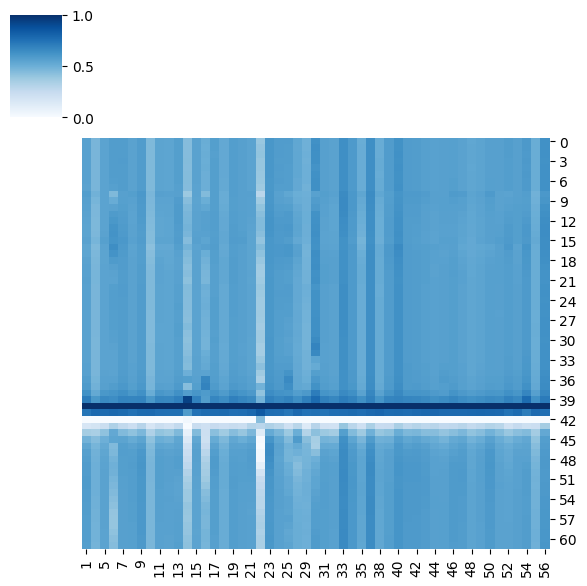

In [9]:
# Create the clustermap
g = sns.clustermap(ephy_T, 
                   metric="euclidean", 
                   method="average", 
                   cmap="Blues", 
                   row_cluster=False,  
                   col_cluster=False,  
                   standard_scale=1,  
                   dendrogram_ratio = (0.1, 0.2),
                   figsize=(6, 6)) 

plt.tight_layout()
plt.show()

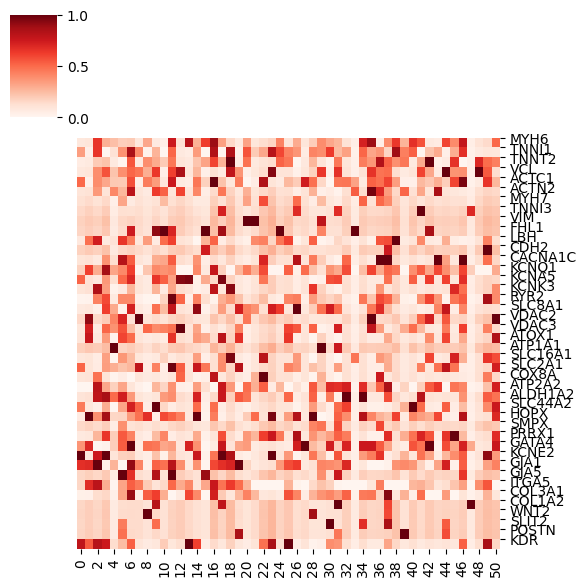

In [10]:
# Create the clustermap
g = sns.clustermap(gene_T, 
                   metric="euclidean", 
                   method="average", 
                   cmap="Reds", 
                   row_cluster=False,  
                   col_cluster=False,  
                   standard_scale=1,  
                   dendrogram_ratio = (0.1, 0.2),
                   figsize=(6, 6)) 

# Set the y-ticks and yticklabels explicitly
g.ax_heatmap.set_yticks(range(len(genes_in_data)))  
g.ax_heatmap.set_yticklabels(genes_in_data, rotation=0)  

# Adjust layout
plt.tight_layout()
plt.show()

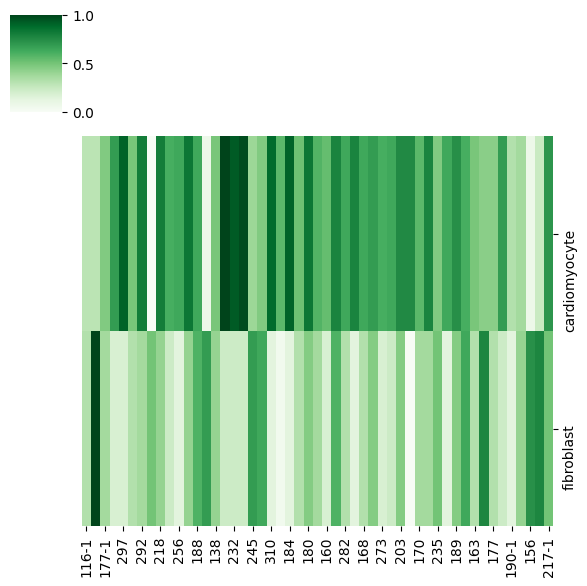

In [11]:
# Create the clustermap
g = sns.clustermap(cell_comp_T, 
                   metric="euclidean", 
                   method="average", 
                   cmap="Greens", 
                   row_cluster=False,  
                   col_cluster=False,  
                   standard_scale=False,
                   dendrogram_ratio = (0.1, 0.2),
                   figsize=(6, 6)) 

# Adjust layout
plt.tight_layout()
plt.show()